In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Results Analysis
The objective of this notebook is to analyze the results obtained throughout the work done.

## Synthetic tests


- In addition to Tudor's synthetic tests, there are a few other things that should get tested:
    - Model parameters which are not distributed in the same way (e.g. two gaussians that decay at different rates and are centered in different locations)
	- Chosen Parameter (Voronoi, Delaunay, Delaunay-Cloughner)
	- Parallel Chains & Parallel Tempering (1 Chain, 4 Parallel Chains, 2 Parallel Chains at 2 temperatures each)

### Models and observations 
Synthetic tests must be somewhat representative of the data that we are trying to invert for:

In [2]:
# Load true model parameters 
snow_true = np.loadtxt("SyntheticTests/syntheticobs_franke.img.A")
ice_true =  np.loadtxt("SyntheticTests/syntheticobs_franke.img.B")

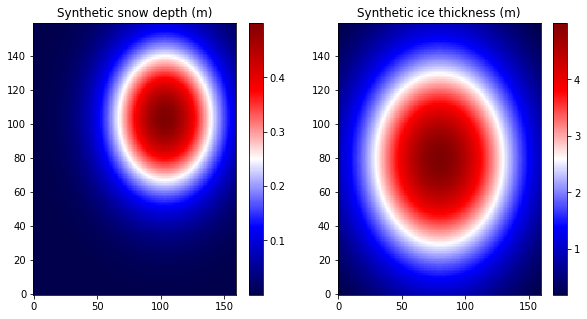

In [11]:
# Plot true models
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

img = ax[0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower')
ax[0].set_title('Synthetic snow depth (m)')
plt.colorbar(img, ax=ax[0])

img = ax[1].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower')
ax[1].set_title('Synthetic ice thickness (m)')
plt.colorbar(img, ax=ax[1])

plt.show()


In [14]:
# Load observations
obs = pd.read_table("SyntheticTests/synthetic_obs.txt", skiprows=1, names=["Lon", "Lat", "Type", "Value", "Sigma"], delimiter="\s+")

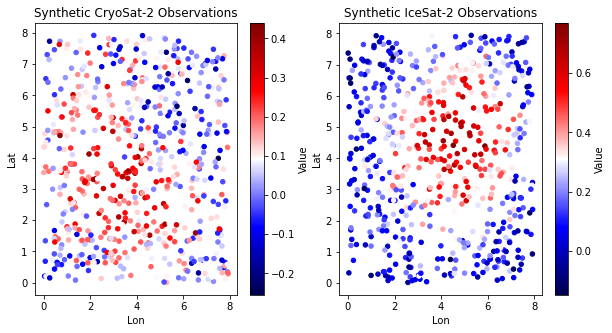

In [19]:
# Plot observations
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

obs[obs['Type']==0].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[0], title='Synthetic CryoSat-2 Observations', cmap='seismic')
obs[obs['Type']==1].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[1], title='Synthetic IceSat-2 Observations', cmap='seismic')

plt.show()


### Different Parameters
Here we will try to understand how different tessellation parameters work. First let's take a look at the plots themselves side by side and then we will load up some statistics.

In [44]:
# Load data
voronoi = [np.loadtxt("SyntheticTests/Voronoi/snow"), np.loadtxt("SyntheticTests/Voronoi/ice")]
delaunay = [np.loadtxt("SyntheticTests/Delaunay/snow"), np.loadtxt("SyntheticTests/Delaunay/ice")]
delaunay_c = [np.loadtxt("SyntheticTests/DelaunayClaughner/snow"), np.loadtxt("SyntheticTests/DelaunayClaughner/ice")]

Text(0.5, 1.0, 'Delaunay-Cloughner ice thickness inversion')

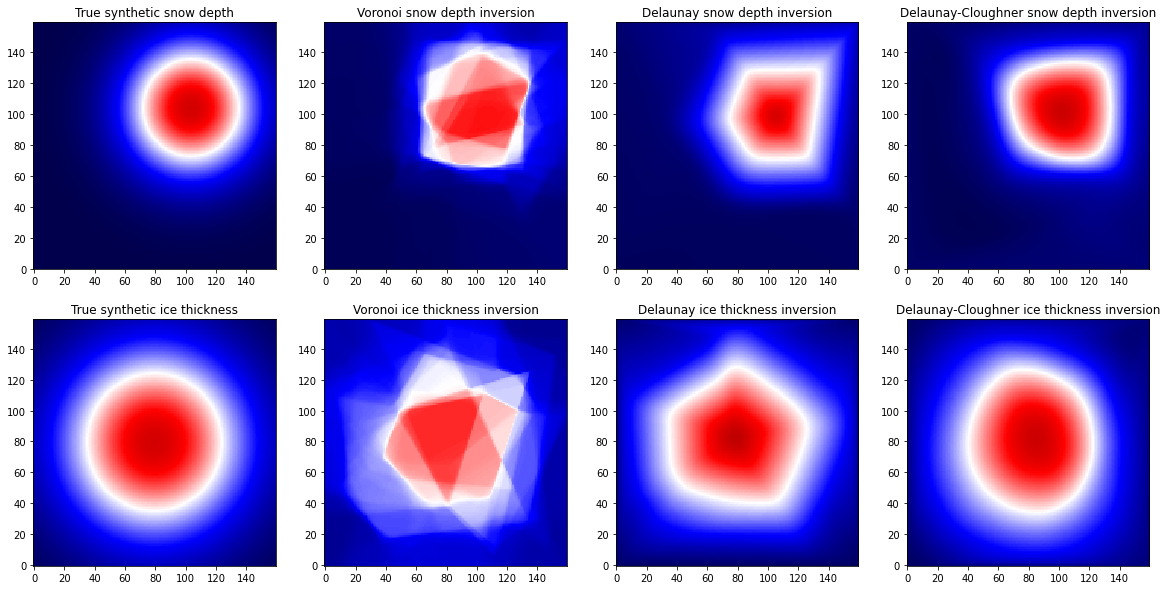

In [45]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

img = ax[0, 0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 0].set_title('True synthetic snow depth')
img = ax[0, 1].imshow(voronoi[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 1].set_title('Voronoi snow depth inversion')
img = ax[0, 2].imshow(delaunay[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 2].set_title('Delaunay snow depth inversion')
img = ax[0, 3].imshow(delaunay_c[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 3].set_title('Delaunay-Cloughner snow depth inversion')

img = ax[1, 0].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 0].set_title('True synthetic ice thickness')
img = ax[1, 1].imshow(voronoi[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 1].set_title('Voronoi ice thickness inversion')
img = ax[1, 2].imshow(delaunay[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 2].set_title('Delaunay ice thickness inversion')
img = ax[1, 3].imshow(delaunay_c[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 3].set_title('Delaunay-Cloughner ice thickness inversion')



### Parallelization

In [56]:
# Load data
chain1 = [np.loadtxt("SyntheticTests/1Chain/snow"), np.loadtxt("SyntheticTests/1Chain/ice")]
chain4 = [np.loadtxt("SyntheticTests/4Chains/snow"), np.loadtxt("SyntheticTests/4Chains/ice")]
chain2temp2 = [np.loadtxt("SyntheticTests/2Chains2T/snow"), np.loadtxt("SyntheticTests/2Chains2T/ice")]

Text(0.5, 1.0, '2 Chains at 2 Temperatures')

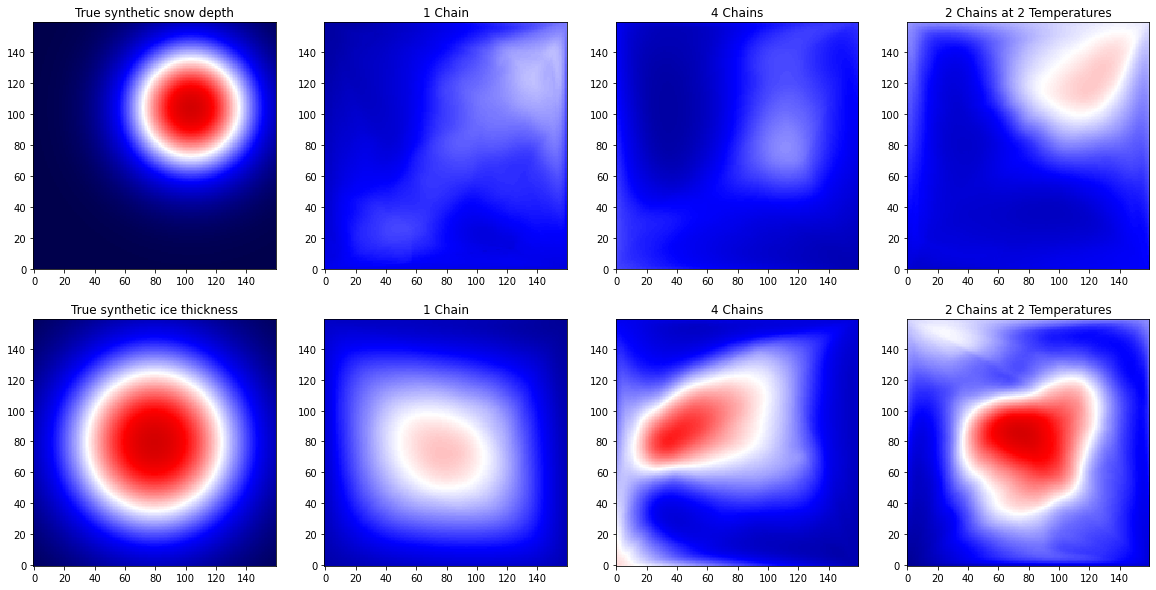

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

img = ax[0, 0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 0].set_title('True synthetic snow depth')
img = ax[0, 1].imshow(chain1[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 1].set_title('1 Chain')
img = ax[0, 2].imshow(chain4[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 2].set_title('4 Chains')
img = ax[0, 3].imshow(chain2temp2[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 3].set_title('2 Chains at 2 Temperatures')

img = ax[1, 0].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 0].set_title('True synthetic ice thickness')
img = ax[1, 1].imshow(chain1[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 1].set_title('1 Chain')
img = ax[1, 2].imshow(chain4[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 2].set_title('4 Chains')
img = ax[1, 3].imshow(chain2temp2[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 3].set_title('2 Chains at 2 Temperatures')

